# Import

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

import pandas as pd
import pickle

In [2]:
# Read CSV file
df = pd.read_csv('dataset.csv')

# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [4]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


array([[<Axes: title={'center': 'Person ID'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Sleep Duration'}>],
       [<Axes: title={'center': 'Quality of Sleep'}>,
        <Axes: title={'center': 'Physical Activity Level'}>,
        <Axes: title={'center': 'Stress Level'}>],
       [<Axes: title={'center': 'Heart Rate'}>,
        <Axes: title={'center': 'Daily Steps'}>, <Axes: >]], dtype=object)

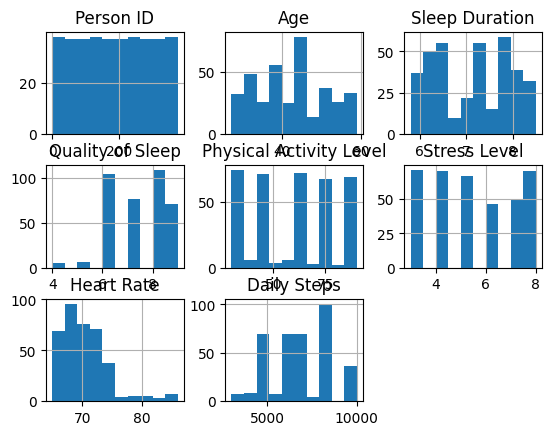

In [5]:
df.hist()

In [6]:
df['Heart Rate'].value_counts()

Heart Rate
68    94
70    76
72    69
65    67
75    36
78     5
85     3
80     3
77     2
76     2
69     2
67     2
81     2
84     2
74     2
83     2
73     2
86     2
82     1
Name: count, dtype: int64

# Split Dataset

In [7]:
X = df.drop(columns=['Quality of Sleep', 'Person ID'])
y = df["Quality of Sleep"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(299, 11)
(75, 11)
(299,)
(75,)


# Model

In [8]:
num_cols = X.select_dtypes(include=['float64', 'int64']).columns
obj_cols = X.select_dtypes(include=['object']).columns

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), num_cols),
        ('obj', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), obj_cols)
    ]
)

In [9]:
# Model using Pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Hyperparameter
param_grid = {
    'classifier__C': [0.9, 1.0, 1.1],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__max_iter': [100, 200, 300],
    'classifier__solver': ['lbfgs', 'liblinear', 'newton-cg']
}

# GridSearchCV
grid = GridSearchCV(model, param_grid, cv=3)

grid.fit(X_train, y_train)

y_train_pred = grid.predict(X_train)
y_test_pred = grid.predict(X_test)

c:\Users\Niko Sutiono\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
54 fits failed out of a total of 162.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Niko Sutiono\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Niko Sutiono\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File 

In [10]:
print(grid.best_params_)

{'classifier__C': 1.0, 'classifier__max_iter': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'newton-cg'}


# Accuracy

In [11]:
print("[ Test Accuracy ]")
print(f"Accuracy Score: {accuracy_score(y_test, y_test_pred)}")
print()

print("Classification Report:")
print(classification_report(y_test, y_test_pred))

[ Test Accuracy ]
Accuracy Score: 0.92

Classification Report:
              precision    recall  f1-score   support

           4       0.33      0.50      0.40         2
           5       1.00      0.33      0.50         3
           6       0.88      1.00      0.94        23
           7       1.00      0.86      0.92        14
           8       0.95      1.00      0.97        19
           9       1.00      0.93      0.96        14

    accuracy                           0.92        75
   macro avg       0.86      0.77      0.78        75
weighted avg       0.93      0.92      0.92        75



In [12]:
print("[ Train Accuracy ]")
print(f"Accuracy Score: {accuracy_score(y_train, y_train_pred)}")
print()

print("Classification Report:")
print(classification_report(y_train, y_train_pred))

[ Train Accuracy ]
Accuracy Score: 0.9933110367892977

Classification Report:
              precision    recall  f1-score   support

           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         4
           6       0.99      1.00      0.99        82
           7       1.00      0.98      0.99        63
           8       0.99      1.00      0.99        90
           9       1.00      0.98      0.99        57

    accuracy                           0.99       299
   macro avg       1.00      0.99      1.00       299
weighted avg       0.99      0.99      0.99       299



# Model.pkl

In [13]:
pickle.dump(grid, open("model.pkl", "wb"))